In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.1.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

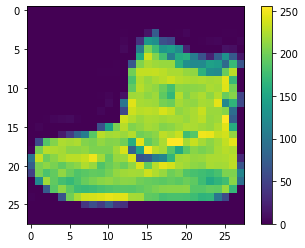

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

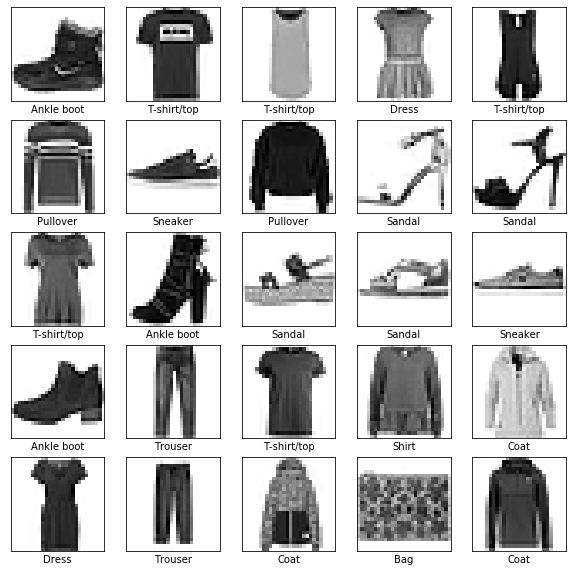

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4987 - accuracy: 0.8247
Epoch 2/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3738 - accuracy: 0.8653
Epoch 3/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3367 - accuracy: 0.8772
Epoch 4/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3120 - accuracy: 0.8850
Epoch 5/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2955 - accuracy: 0.8914
Epoch 6/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2816 - accuracy: 0.8952
Epoch 7/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2694 - accuracy: 0.9004
Epoch 8/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2582 - accuracy: 0.9043
Epoch 9/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2490 - accuracy: 0.9072
Epoch 10/50
60

In [16]:
model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 0s - loss: 0.5543 - accuracy: 0.8846


[0.554270613117516, 0.8846]

In [17]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[0])

In [ ]:
test_labels[0]

In [ ]:
img = test_images[1]
img.shape

In [ ]:
img = np.expand_dims(img, 0)
img.shape

In [ ]:
predictions_single = probability_model.predict(img)
predictions_single

In [ ]:
np.argmax(predictions_single[0])

In [ ]:
predictions_single.shape